In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.metrics import mean_squared_error, mean_absolute_error

pd.set_option('display.max_columns', None)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
print('Importing Finished')

/kaggle/input/mushroom-classification/mushrooms.csv
Importing Finished


In [2]:
#Reading in the data
df = pd.read_csv("../input/mushroom-classification/mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [3]:
#Cleaning column names
cleaned_cols = [col.replace("-", "_") for col in df.columns]
df = pd.DataFrame(data = df.values,
                 columns = cleaned_cols,
                 index = df.index)

X = df.iloc[:,1:]
y = df.iloc[:,0]

df.head()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


# Exploratory Data Analysis

In [4]:
df.dtypes

#All columns are categorical

class                       object
cap_shape                   object
cap_surface                 object
cap_color                   object
bruises                     object
odor                        object
gill_attachment             object
gill_spacing                object
gill_size                   object
gill_color                  object
stalk_shape                 object
stalk_root                  object
stalk_surface_above_ring    object
stalk_surface_below_ring    object
stalk_color_above_ring      object
stalk_color_below_ring      object
veil_type                   object
veil_color                  object
ring_number                 object
ring_type                   object
spore_print_color           object
population                  object
habitat                     object
dtype: object

In [5]:
df.describe()

#Binomial outcome (edible or poisonous), relatively low cardinality of features
#Some features are ordinal and others are not

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
#Dropping veil_type as it is uninformative (all same value)
df = df.drop(columns = 'veil_type')
X = X.drop(columns = 'veil_type')
df.head()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,w,o,e,n,a,g


In [7]:
#Distribution of values within each feature
for col in df.columns:
    print(df[col].value_counts())
    
#We see that there is a ? for stalk root, indicating it is missing data
#Most features are well-disbursed but many (cap-shape, cap-surface, cap-color, stalk-color-above-ring, veil-color) have some values 
#that appear very infrequently (< 20 / 8124)

e    4208
p    3916
Name: class, dtype: int64
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap_shape, dtype: int64
y    3244
s    2556
f    2320
g       4
Name: cap_surface, dtype: int64
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap_color, dtype: int64
f    4748
t    3376
Name: bruises, dtype: int64
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
f    7914
a     210
Name: gill_attachment, dtype: int64
c    6812
w    1312
Name: gill_spacing, dtype: int64
b    5612
n    2512
Name: gill_size, dtype: int64
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill_color, dtype: int64
t    4608
e    3516
Name: stalk_shape, dtype: int64
b    3776
?    2480
e    1120
c     556
r     192
Name: stalk_root, dtype: int64
s    5176
k    2372
f     552
y      24
Name: stalk_surf

In [8]:
#Features with rare values
rare_valued_cols = [col for col in df.columns if df[col].value_counts().min() <= 20]
print(rare_valued_cols)

#These rare values could present issues in training a model as they could effectively act as noise in the data. 
#If problematic, we may need to treat them as outliers and remove.

['cap_shape', 'cap_surface', 'cap_color', 'stalk_color_above_ring', 'veil_color']


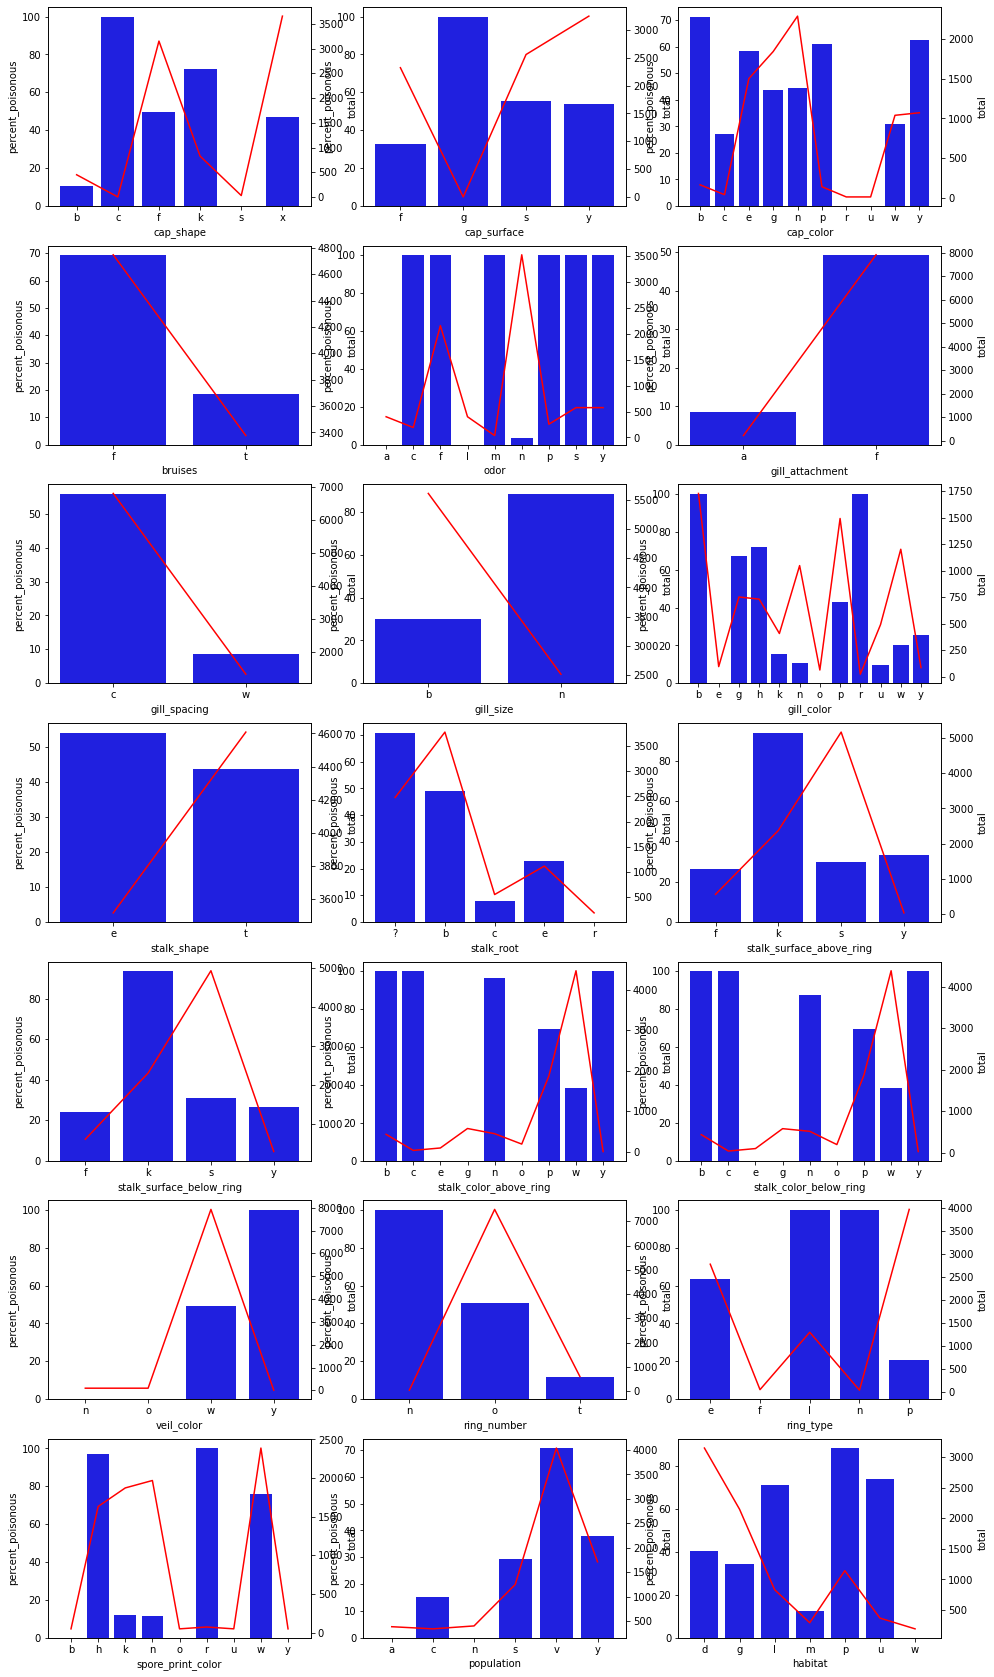

In [9]:
fig = plt.figure(figsize=(16,30))
for i in range(len(X.columns)):
    fig.add_subplot(7,3,i+1)
    col = X.columns[i]
    a = df.groupby(col).apply(lambda df: df['class'] == 'p').reset_index()
    a = a.groupby(col)['class'].agg({'sum', 'count'}).reset_index().rename(columns = {'count':'total', 'sum':'total_poisonous'})
    a['percent_poisonous'] = round(a['total_poisonous'] *100 / a['total'], 2)
#     plt.title('Percent of Edible Mushrooms by Subcategory in {}'.format(df.columns[1]))
    ax = sns.barplot(x = a[col], y = a['percent_poisonous'], color = 'b')
    ax2 = ax.twinx()
    sns.lineplot(x = a[col], y = a['total'], ax = ax2, color = 'r')
    
plt.show()

#Some variables are clearly more predictive of poisonous/edible such as odor, stalk_color_below_ring, spore_print_color whereas
#others are poor predictors as they split close to 50% (stalk_shape, cap_color, stalk_surface_above_ring)

Clustering

In [10]:
#The next step to exploring the data is understanding the relationships between the features.
#Because all of the data is categorical, we need another measure or method to determine similarity outside of correlation.
#Clustering can highlight distinguishing features of the mushrooms as well as those that permeate across many types.  

In [137]:
#Splitting data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,train_size=0.8, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size = 0.25,train_size =0.75, random_state = 0)
print("""Train dataset size: {},
Validation dataset size: {},
Test dataset size: {}""".format(X_train.shape, X_val.shape, X_test.shape))

Train dataset size: (4874, 21),
Validation dataset size: (1625, 21),
Test dataset size: (1625, 21)


In [138]:
#Transforming target labels
y_le = LabelEncoder()
y_train = pd.Series(y_le.fit_transform(y_train), index = X_train.index)
y_val = pd.Series(y_le.transform(y_val), index = X_val.index)
y_test = pd.Series(y_le.transform(y_test), index = X_test.index)

y_le.classes_

array(['e', 'p'], dtype=object)

In [139]:
#Kmodes Clustering

from kmodes.kmodes import KModes

#performing clustering on training and validation sets
X_val_train = pd.concat([X_val, X_train])

#imputing missing values (which are '?') and encoding the data
clustering_imputer = SimpleImputer(missing_values = '?', strategy = 'most_frequent')
clustering_ord_enc = OrdinalEncoder()

clustering_transformer = Pipeline(steps = [
    ('imputer', clustering_imputer),
    ('ord_enc', clustering_ord_enc)
])

kmodes_df = pd.DataFrame(data = clustering_transformer.fit_transform(X_val_train), columns = X.columns)

#clustering mushrooms into 2 to 10 clusters
k_list = [x+2 for x in range(9)]

km = {}
km_clusters = {}

for k in k_list:
    km[k] = KModes(n_clusters = k, n_init = 10, verbose = 0)
    km_clusters[k] = km[k].fit_predict(kmodes_df)

km_clusters

{2: array([0, 0, 0, ..., 0, 0, 1], dtype=uint16),
 3: array([0, 2, 0, ..., 1, 0, 1], dtype=uint16),
 4: array([0, 2, 3, ..., 3, 0, 1], dtype=uint16),
 5: array([0, 4, 3, ..., 3, 0, 1], dtype=uint16),
 6: array([0, 4, 3, ..., 5, 0, 1], dtype=uint16),
 7: array([0, 4, 3, ..., 5, 0, 1], dtype=uint16),
 8: array([0, 4, 3, ..., 5, 0, 1], dtype=uint16),
 9: array([0, 4, 3, ..., 5, 0, 1], dtype=uint16),
 10: array([0, 2, 3, ..., 5, 0, 1], dtype=uint16)}

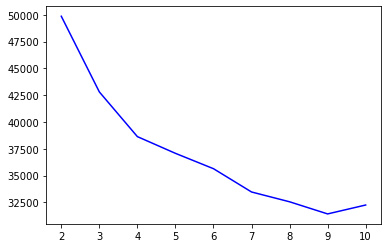

In [14]:
#Graphing the clustering cost for each k
km_cost = [km[k].cost_ for k in k_list]
sns.lineplot(k_list, km_cost, color = 'b')

#There are "elbows" at k=4,7,9 but for interpretability, we'll choose 4 clusters

In [16]:
#The 4 clusters' centroids, or modes
final_clusters = pd.DataFrame(data = clustering_ord_enc.inverse_transform(pd.DataFrame(km[4].cluster_centroids_)), columns = X.columns, index = [[0,1,2,3]] )
final_clusters

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,x,y,n,t,n,f,c,b,w,t,b,s,s,w,w,w,o,p,n,v,d
1,x,f,g,f,f,f,c,b,g,e,b,k,k,b,p,w,o,l,h,y,g
2,f,y,e,f,f,f,c,n,b,t,b,k,s,w,p,w,o,e,w,v,l
3,x,s,g,f,n,f,w,b,p,t,e,s,s,w,w,w,o,e,k,s,g


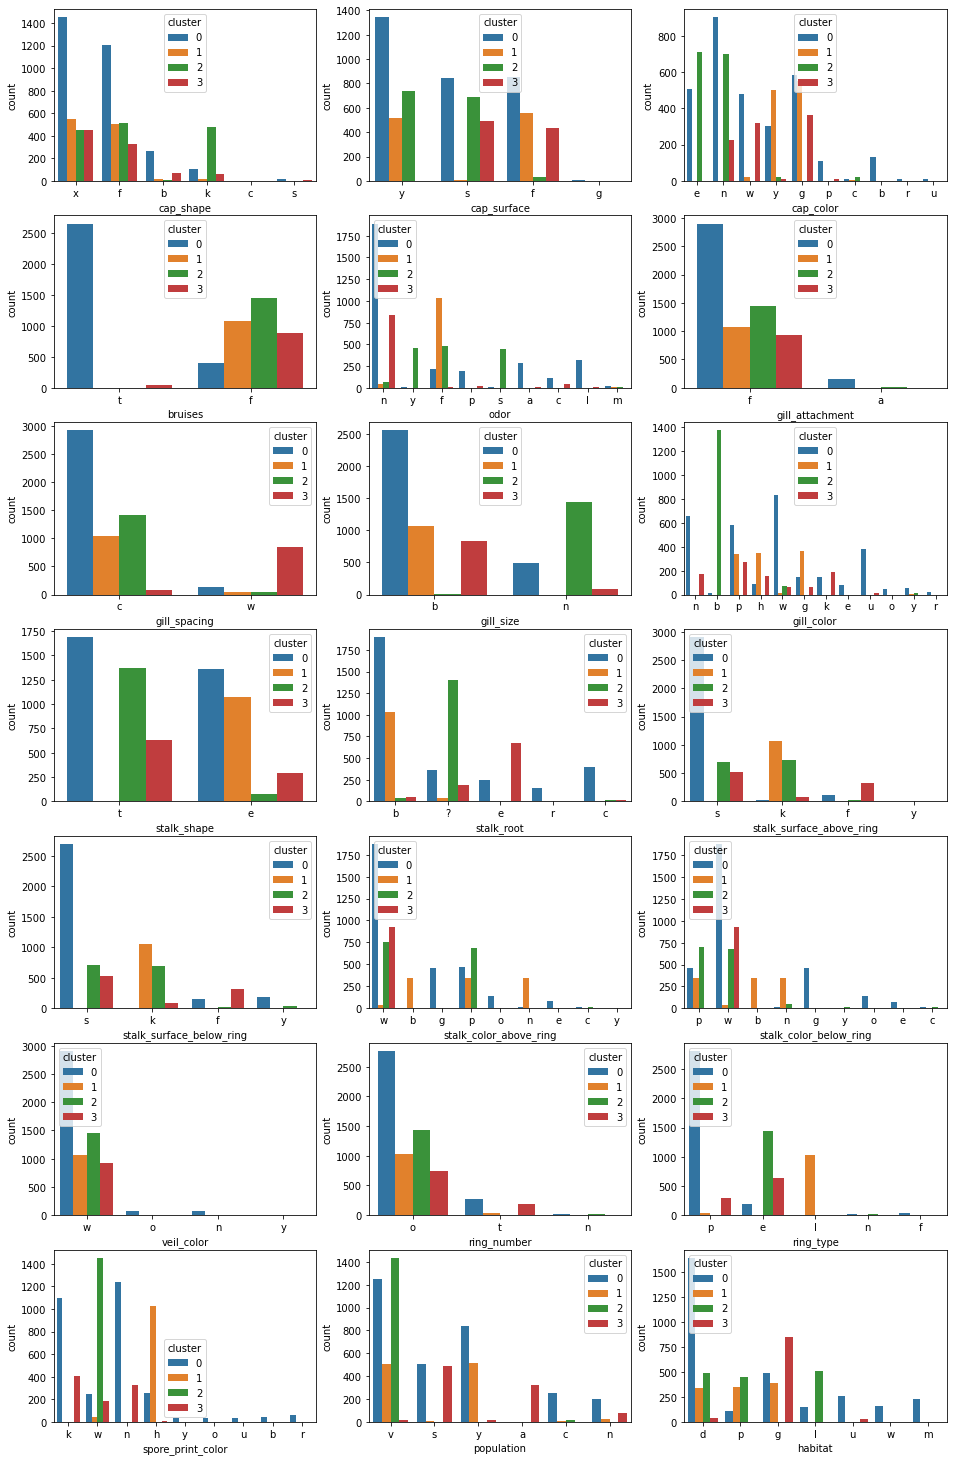

In [134]:
#Graphing the features of the mushrooms by what cluster they fall into
df_val_train = X_val_train
df_val_train['cluster'] = pd.Series(km_clusters[4], index = df_val_train.index)

fig = plt.figure(figsize=(16,26))
for i in range(len(X.columns)):
    fig.add_subplot(7,3,i+1)
    col = X.columns[i]
    sns.countplot(x = col, data = df_val_train, hue = 'cluster')
    
plt.show()

#Nearly all of cluster 2 mushrooms have gill color b (b stands for buff) and gill color b is exclusively comprised of cluster 2 mushrooms. 
#This indicates that a gill color of buff is a defining characteristic of cluster 2 mushrooms. 
#Looking at the graphs, we can see that gill_color, odor, spore_print_color among others are defining characteristics for some of the clusters
#whereas cap_shape, for example, is not a differentiating feature between the clusters

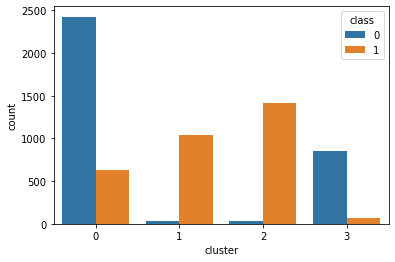

In [135]:
#Graphing clusters by their class
y_val_train = pd.Series(pd.concat([y_val, y_train]))
df_val_train['class'] = y_val_train
sns.countplot('cluster', data = df_val_train, hue = 'class')

#Cluster 0 and 3 are predominantly of edible mushrooms and clusters 1 and 2 are made up of nearly all poisonous mushrooms.
#Cluster 0 seems to be a catch-all category as evidenced by the greater number of mushrooms in its cluster, its diversity of 
#mushroom class, and its diversity of features as seen in the graphs above

#This graph indicates that mushrooms of similar features are likely of the same class. In other words, at least some of these 
#features, likely the defining ones mentioned above, have the potential to help us in classifying mushrooms with high accuracy.

# **Logistic Regression**

Preprocessing

In [63]:
#Preprocessing pipeline for logistic regression

#categorizing features as ordinal or nominal
#features with 2 unique values in the training set are categorized as ordinal (and ring_number), all others are nominal
ord_cols = [col for col in X.columns if X[col].nunique() == 2]
nom_cols = [col for col in X.columns if col not in ord_cols]
nom_cols.remove('ring_number')

#imputer for any columns with missing values (only stalk_root)
imputer = SimpleImputer(missing_values = '?', strategy = 'most_frequent')

#onehot encoder for nominal variables
encoder_nom = OneHotEncoder(handle_unknown = 'ignore')

#Nominal variables should in general be one-hot encoded as there is no known or implied ordering between the values
#Logistic regression with a penalty is adept at handling one-hot encoded variables and the penalty will account for the collinearity 
#deriving from one-hot encoding

#ordinal encoder for columns with inferred ordering (ring_number)
encoder_ord1 = OrdinalEncoder(categories=[['n', 'o', 't']])

#n, o, and t stand for none, one, and two, respectively. This is a natural ordering that we know so therefore it was hardcoded in the encoder

#ordinal encoder for all other ordinal variables
encoder_ord2 = OrdinalEncoder()

nom_transformer = Pipeline(steps = [
    ('imputer', imputer),
    ('onehot', encoder_nom)
])

ord_transformer = Pipeline(steps = [
    ('imputer', imputer),
    ('ord_enc', encoder_ord2)
])

preprocessor_log = ColumnTransformer(
    transformers = [
        ('nom', nom_transformer, nom_cols),
        ('ord1', encoder_ord1, ['ring_number']),
        ('ord2', ord_transformer, ord_cols)
])

In [ ]:
print(ord_cols)

Modeling

In [104]:
#Building logistic model with penalty
penalty = ['l1','l2']
C = [.01, 0.1, 1, 5, 10, 100]

logistic = {}
for p in penalty:
    for c in C:
        logistic[(c,p)] = LogisticRegression(C=c, penalty=p, solver='liblinear', random_state=0)

In [ ]:
# for key in logistic.keys():
#     print(key)

In [105]:
#Bundling pipeline (preprocessing and modeling) for logistic regression with penalty
bundled_pipeline_log = {}
for key in logistic.keys():
    bundled_pipeline_log[key] = Pipeline(steps = [
        ('preprocessing', preprocessor_log),
        ('model', logistic[key])
    ])

In [106]:
#Fit, predict, and calculate loss for the logistic models of different parameters
pred_log = {}
pred_proba_log = {}
accuracy_log = {}

for key in bundled_pipeline_log.keys():
    bundled_pipeline_log[key].fit(X_train, y_train)

    pred_log[key] = bundled_pipeline_log[key].predict(X_val)
    pred_proba_log[key] = bundled_pipeline_log[key].predict_proba(X_val)

    accuracy_log[key] = bundled_pipeline_log[key].score(X_val, y_val)

accuracy_log

{(0.01, 'l1'): 0.9790769230769231,
 (0.1, 'l1'): 0.9969230769230769,
 (1, 'l1'): 1.0,
 (5, 'l1'): 1.0,
 (10, 'l1'): 1.0,
 (100, 'l1'): 1.0,
 (0.01, 'l2'): 0.9833846153846154,
 (0.1, 'l2'): 0.9963076923076923,
 (1, 'l2'): 1.0,
 (5, 'l2'): 1.0,
 (10, 'l2'): 1.0,
 (100, 'l2'): 1.0}

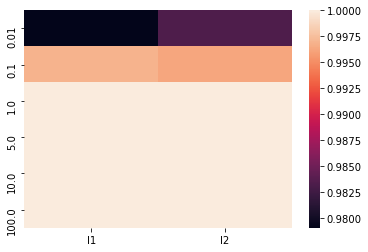

In [97]:
#Visualizing logistic models' accuracies on validation set as a heatmap
accuracy_log_series = pd.Series(list(accuracy_log.values()),
                  index=pd.MultiIndex.from_tuples(accuracy_log.keys()))
accuracy_log_df = accuracy_log_series.unstack()
sns.heatmap(accuracy_log_df)

In [107]:
#Displaying feature importance through coefficients of logistic regression
pd.set_option('display.max_rows', 150)

#choosing one of the many perfectly accurate logistic models
best_log = bundled_pipeline_log[(1, 'l1')]
nom_cols_expanded = list(best_log['preprocessing'].transformers_[0][1]['onehot'].get_feature_names(nom_cols))

pipeline_cols_log = nom_cols_expanded + ['ring_number'] + ord_cols
coef_data_log = best_log['model'].coef_.reshape((108,1))
coef_df_log = pd.DataFrame(data = coef_data_log, index = pipeline_cols_log).rename(columns = {0: 'coef_value'})

#filtering out zero-valued coefficients
coef_df_log.loc[coef_df_log.coef_value != 0].coef_value.sort_values(ascending=True)

#Note: Negative indicates a prediction of edible and positive for poisonous. 
#We can use coefficient magnitudes as a proxy for feature importance. 
#Odor, spore_print_color, gill_size, and population are some of the most impactful features (if that characteristic of the mushroom
# is present).  

odor_l                        -8.650916
odor_n                        -8.354886
odor_a                        -8.325948
habitat_w                     -0.783344
cap_surface_f                 -0.501709
gill_spacing                  -0.487410
stalk_surface_below_ring_f    -0.286755
population_y                  -0.120793
stalk_root_b                   0.009357
cap_shape_b                    0.117104
odor_c                         0.304960
bruises                        0.363949
cap_color_w                    0.437900
spore_print_color_w            1.221222
stalk_surface_below_ring_y     2.476967
stalk_surface_above_ring_k     2.740306
population_c                   2.785570
gill_size                      4.895139
odor_f                         5.221512
spore_print_color_r           11.587914
Name: coef_value, dtype: float64

In [69]:
#Ordinal column labels
for i in range(len(ord_cols)):
    print('Ordering of levels within {} column: {}'.format(ord_cols[i], best_log['preprocessing'].transformers_[2][1][1].categories_[i]))

Ordering of levels within bruises column: ['f' 't']
Ordering of levels within gill_attachment column: ['a' 'f']
Ordering of levels within gill_spacing column: ['c' 'w']
Ordering of levels within gill_size column: ['b' 'n']
Ordering of levels within stalk_shape column: ['e' 't']


# Decision Tree / Random Forest

Preprocessing

In [70]:
#Preprocessing Decision Tree / Random Forest Classifier
preprocessor_dt = ColumnTransformer(
    transformers = [
        ('ord1', encoder_ord1, ['ring_number']),
        ('ord2', ord_transformer, ord_cols + nom_cols)
    ])

#Using the same preprocessor for DTs and RFs. Unlike logistic regression, these tree-based models perform better with ordinal encoding,
#even when the variable is nominal. This is because one-hot encoding variables in these models generally devalues the splits of these
#variables and leads to sparse trees

In [71]:
#Creating DTs and RFs with various hyperparameter values
max_depth = [1, 5, 10, 20]
max_features = [.1, .25, .5, .75, "auto"]
n_estimators = [10, 25, 50]

dt = {}
rf = {}
for d in max_depth:
    for f in max_features:
        dt[(f,d)] = DecisionTreeClassifier(max_depth = d, max_features = f, random_state=0)

for d in max_depth:
    for f in max_features:
        for e in n_estimators:
            rf[(f,d,e)] = RandomForestClassifier(n_estimators = e, max_depth = d, max_features = f, random_state=0)

In [72]:
#Bundling pipeline (preprocessing and modeling) for logistic regression with penalty
bundled_pipeline_dt = {}
for key in dt.keys():
    bundled_pipeline_dt[key] = Pipeline(steps = [
        ('preprocessing', preprocessor_dt),
        ('model', dt[key])
    ])
    
bundled_pipeline_rf = {}
for key in rf.keys():
    bundled_pipeline_rf[key] = Pipeline(steps = [
        ('preprocessing', preprocessor_dt),
        ('model', rf[key])
    ])

(6499, 23)

In [73]:
#Fit, predict, and calculate loss for DT model
pred_dt = {}
pred_proba_dt = {}
accuracy_dt = {}

for key in bundled_pipeline_dt.keys():
    bundled_pipeline_dt[key].fit(X_train, y_train)

    pred_dt[key] = bundled_pipeline_dt[key].predict(X_val)
    pred_proba_dt[key] = bundled_pipeline_dt[key].predict_proba(X_val)

    accuracy_dt[key] = bundled_pipeline_dt[key].score(X_val, y_val)

accuracy_dt

{(0.1, 1): 0.7618461538461538,
 (0.25, 1): 0.7618461538461538,
 (0.5, 1): 0.7735384615384615,
 (0.75, 1): 0.7735384615384615,
 ('auto', 1): 0.7618461538461538,
 (0.1, 5): 0.8904615384615384,
 (0.25, 5): 0.9883076923076923,
 (0.5, 5): 0.9907692307692307,
 (0.75, 5): 0.9815384615384616,
 ('auto', 5): 0.9852307692307692,
 (0.1, 10): 0.9938461538461538,
 (0.25, 10): 1.0,
 (0.5, 10): 0.9975384615384615,
 (0.75, 10): 0.9987692307692307,
 ('auto', 10): 1.0,
 (0.1, 20): 1.0,
 (0.25, 20): 1.0,
 (0.5, 20): 1.0,
 (0.75, 20): 0.9987692307692307,
 ('auto', 20): 1.0}

In [74]:
#Fit, predict, and calculate loss for RF model
pred_rf = {}
pred_proba_rf = {}
accuracy_rf = {}

for key in bundled_pipeline_rf.keys():
    bundled_pipeline_rf[key].fit(X_train, y_train)

    pred_rf[key] = bundled_pipeline_rf[key].predict(X_val)
    pred_proba_rf[key] = bundled_pipeline_rf[key].predict_proba(X_val)

    accuracy_rf[key] = bundled_pipeline_rf[key].score(X_val, y_val)

accuracy_rf

{(0.1, 1, 10): 0.9076923076923077,
 (0.1, 1, 25): 0.9323076923076923,
 (0.1, 1, 50): 0.9286153846153846,
 (0.25, 1, 10): 0.8541538461538462,
 (0.25, 1, 25): 0.896,
 (0.25, 1, 50): 0.9156923076923077,
 (0.5, 1, 10): 0.7735384615384615,
 (0.5, 1, 25): 0.7735384615384615,
 (0.5, 1, 50): 0.7735384615384615,
 (0.75, 1, 10): 0.7735384615384615,
 (0.75, 1, 25): 0.7735384615384615,
 (0.75, 1, 50): 0.7735384615384615,
 ('auto', 1, 10): 0.8541538461538462,
 ('auto', 1, 25): 0.8916923076923077,
 ('auto', 1, 50): 0.9070769230769231,
 (0.1, 5, 10): 0.9889230769230769,
 (0.1, 5, 25): 0.992,
 (0.1, 5, 50): 0.992,
 (0.25, 5, 10): 0.9926153846153846,
 (0.25, 5, 25): 0.992,
 (0.25, 5, 50): 0.992,
 (0.5, 5, 10): 0.9932307692307693,
 (0.5, 5, 25): 0.9932307692307693,
 (0.5, 5, 50): 0.9932307692307693,
 (0.75, 5, 10): 0.9932307692307693,
 (0.75, 5, 25): 0.9932307692307693,
 (0.75, 5, 50): 0.9932307692307693,
 ('auto', 5, 10): 0.9926153846153846,
 ('auto', 5, 25): 0.992,
 ('auto', 5, 50): 0.992,
 (0.1, 10, 

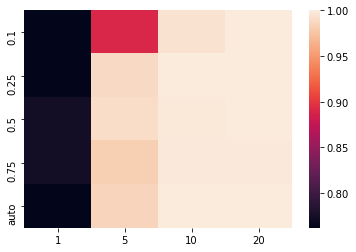

In [75]:
#Displaying feature importance through coefficients of DTs
accuracy_dt_series = pd.Series(list(accuracy_dt.values()),
                  index=pd.MultiIndex.from_tuples(accuracy_dt.keys()))
accuracy_dt_df = accuracy_dt_series.unstack()
sns.heatmap(accuracy_dt_df)

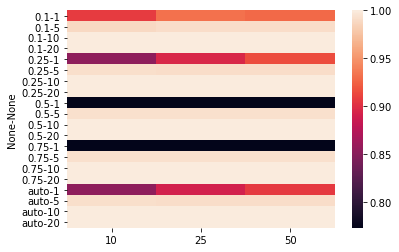

In [76]:
#Displaying feature importance through coefficients of RFs
accuracy_rf_series = pd.Series(list(accuracy_rf.values()),
                  index=pd.MultiIndex.from_tuples(accuracy_rf.keys()))
accuracy_rf_df = accuracy_rf_series.unstack()
sns.heatmap(accuracy_rf_df)

ring_number has feature importance score: 0.02
bruises has feature importance score: 0.05
gill_attachment has feature importance score: 0.0
gill_spacing has feature importance score: 0.0
gill_size has feature importance score: 0.0
stalk_shape has feature importance score: 0.0
cap_shape has feature importance score: 0.0
cap_surface has feature importance score: 0.0
cap_color has feature importance score: 0.0
odor has feature importance score: 0.25
gill_color has feature importance score: 0.37
stalk_root has feature importance score: 0.01
stalk_surface_above_ring has feature importance score: 0.0
stalk_surface_below_ring has feature importance score: 0.0
stalk_color_above_ring has feature importance score: 0.0
stalk_color_below_ring has feature importance score: 0.01
veil_color has feature importance score: 0.0
ring_type has feature importance score: 0.01
spore_print_color has feature importance score: 0.08
population has feature importance score: 0.17
habitat has feature importance scor

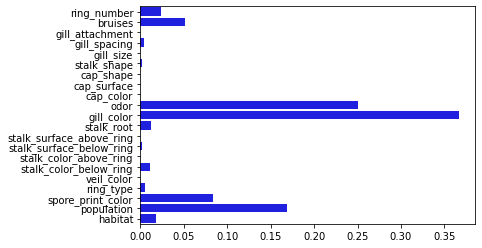

In [77]:
#Visualizing feature importance in the DT

#choosing one of the many perfectly accurate DTs
best_dt = bundled_pipeline_dt[(0.5, 20)]

#features are in the order they were preprocessed in the pipeline
dt_features = ['ring_number'] + ord_cols + nom_cols

for i,f in enumerate(best_dt['model'].feature_importances_):
    print('{} has feature importance score: {}'.format(dt_features[i], round(f, 2)))

sns.barplot(best_dt['model'].feature_importances_, dt_features, color = 'b')

#Note: Changing order of columns with set random seed affects importance levels. 
#Therefore, random forest using a random forest with many trees is likely a better indication of feature importances.

ring_number has feature importance score: 0.01
bruises has feature importance score: 0.01
gill_attachment has feature importance score: 0.0
gill_spacing has feature importance score: 0.03
gill_size has feature importance score: 0.15
stalk_shape has feature importance score: 0.01
cap_shape has feature importance score: 0.0
cap_surface has feature importance score: 0.01
cap_color has feature importance score: 0.01
odor has feature importance score: 0.15
gill_color has feature importance score: 0.2
stalk_root has feature importance score: 0.04
stalk_surface_above_ring has feature importance score: 0.02
stalk_surface_below_ring has feature importance score: 0.02
stalk_color_above_ring has feature importance score: 0.01
stalk_color_below_ring has feature importance score: 0.01
veil_color has feature importance score: 0.0
ring_type has feature importance score: 0.04
spore_print_color has feature importance score: 0.19
population has feature importance score: 0.07
habitat has feature importan

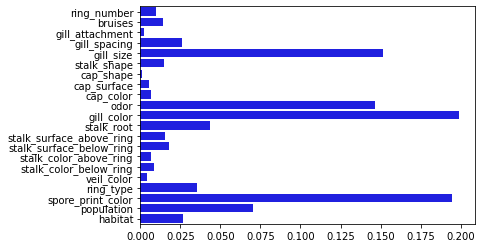

In [78]:
#Visualizing feature importance in the RF

#choosing one of the many perfectly accurate RFs
best_rf = bundled_pipeline_rf[(0.5, 20, 25)]

rf_features = ['ring_number'] + ord_cols + nom_cols

for i,f in enumerate(best_rf['model'].feature_importances_):
    print('{} has feature importance score: {}'.format(rf_features[i], round(f, 2)))
    
sns.barplot(best_rf['model'].feature_importances_, rf_features, color = 'b')

#Gill_color, spore_print_color, odor, gill_size, and population are the most important features of the RF. This is mostly in line
#with what was observed in the DT and logistic regression model. Gill_color was not as emphasized in the logistic regression model
#as it is in the DT and RF, potentially because of the differences in preprocessing, the well-disbursed nature and high cardinality 
#of gill_color that would favor tree-based methods, and/or due to underlying similarities between features

# Prediction

In [151]:
#Fitting chosen models with training and validation data and then predicting on test data

#Fitting
best_log.fit(X_val_train, y_val_train)
best_dt.fit(X_val_train, y_val_train)
best_rf.fit(X_val_train, y_val_train)

#Predicting
log_test_score = best_log.score(X_test, y_test)
dt_test_score = best_dt.score(X_test, y_test)
rf_test_score = best_rf.score(X_test, y_test)

print("""
Logistic regression accuracy on test set: {},
Pruned decision tree accuracy on test set: {},
Random Forest accuracy on test set: {},
""".format(dt_test_score, pruned_dt_test_score, rf_test_score))


Logistic regression accuracy on test set: 1.0,
Pruned decision tree accuracy on test set: 1.0,
Random Forest accuracy on test set: 1.0,

